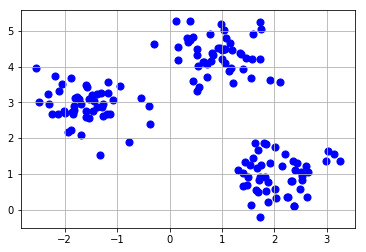

In [9]:
# % matplotlib inline
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c='blue', marker='o', s=50)
plt.grid()
plt.show()

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=13-4, random_state=0) # tol:最后收敛时候结束的方差
y_km = km.fit_predict(X)

kmeans++：  
1、初始化一个集合M存放k个选择的中心点。  
2、从输入样本中随机选择一个中心点$\mu^{(j)}$分配给M  
3、对于不在M中的每个样本$x^{(i)}$，找到与M中中心点中任意的一个最小的平方距离$d(x^{(i)},M)^{2}$  
4、随机选择下一个中心点$\mu^{(p)}$，利用权重概率分布等于$\frac{d(\mu^{(i)},M)^{2}}{\sum_{i}d(x^{(i)},M)^{2}}$    
5、重复3,4步知道k个中心点被选择  
6、执行kmeans

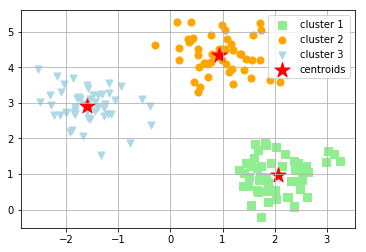

In [11]:
plt.scatter(X[y_km==0,0],X[y_km ==0,1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km ==1,0], X[y_km ==1,1], s=50, c='orange', marker='o', label='cluster 2')
plt.scatter(X[y_km ==2,0],X[y_km ==2,1], s=50, c='lightblue', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()

### soft clustering
fuzzy clustering, fuzzy C-means(FCM)算法。  
一个样本可以归为多类。 

在FCM算法当中，与k-means类似，只是这里把每个点按照权重给不同的类。  
kmeans: $\begin{bmatrix} 
\mu^{(1)} \to 0 \\
\mu^{(2)} \to 1 \\
\mu^{(3)} \to 0 \\
\end{bmatrix}$  
FCM: $\begin{bmatrix} 
\mu^{(1)} \to 0.1 \\
\mu^{(2)} \to 0.85 \\
\mu^{(3)} \to 0.05 \\
\end{bmatrix}$    
FCM步骤：  
1、 定义好类的中心，随机将这些点分配给这些类。
2、 计算这些类的中心点 $\mu^{(j)},j\in{1,...,k}$  
3、 对每个点升级cluster的关系（update cluster membership）  
4、 重复2,3步骤知道成员系数不再发生变化，或者达到了用户定义的忍受chandu，或者是已经达到了最大的迭代次数。  
$min \; J_{m} = \sum_{i=1}^{n}\sum_{j=1}^{k}w^{m(i,j)}\|x^{(i)}-\mu^{(j)}\|_{2}^{2},m \in [1,\infty)$
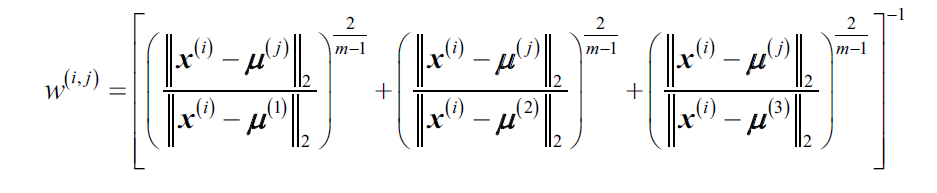


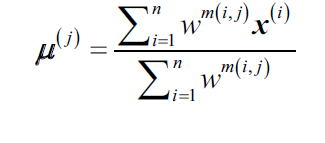

### elbow method 找寻最有的类别数目。
也就是图形发，来估计类别的数目。如果说k增加，那么类间的误差会降低。  
elbow的方法是找到能够让类间的SSE增加最快的k。

In [15]:
# 通过属性获得类间的残差平方和
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


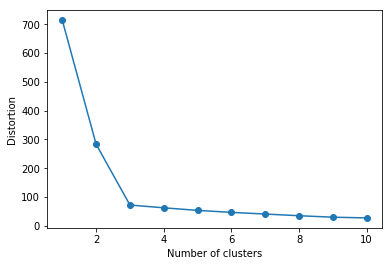

In [16]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

由上图可知，我们选择k=3  

通过silhouette plots来量化聚类的质量。 
通过下面三个步骤计算每个样本的silhouette系数
1、计算类融合（cluster cohesion)$a^{(i)}$，作为样本$x^{(i)}$在与在同一个类别中的其他所有点的平均年距离。  
2、从最近的类中计算类分离（cluster separation）$b^{(i)}$，作为样本$x^{(i)}$和最近的类别中所有的样本。  
3、计算silhouette $s^{(i)}$作为类融合和类分离的差距，被两个数中最大的那个数相除。
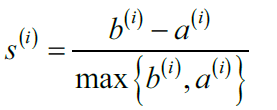
b是类别中的不相似度，a是类别中的相似度。s取值范围在（-1，1），达到1时最好。

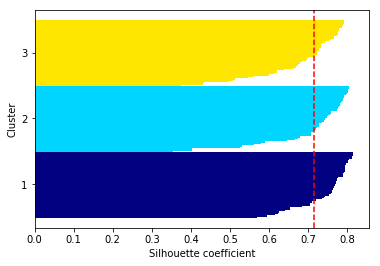

In [24]:
km = KMeans(n_clusters=3, init='k-means++',n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    # print(c_silhouette_vals)
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

从上面的图片可以看出来silhouette系数基本上都不接近0,所以说这个聚类方法比较好。

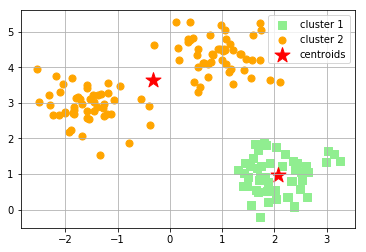

In [27]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0,0], X[y_km==0,1], s=50, c='lightgreen',marker='s', label='cluster 1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=50, c='orange', marker='o', label='cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()

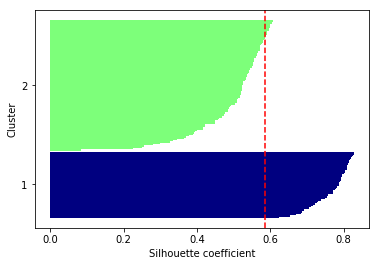

In [28]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    # print(c_silhouette_vals)
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

由上图可以看出来第二个分类的情况不是很好。

### 分层聚类算法：
agglomerative(汇合）和 divisive（分离）


下面将 divisive： 一帮有两种， single linkage或者complete linkage  

single： 计算每对类间的的承兑的观测的相似度，记录最小相似度，将这些中最小相似度联合起来。

complete: 计算类别A，B中承兑观测的相似度，记录最大不同的相似度，融合这两个。

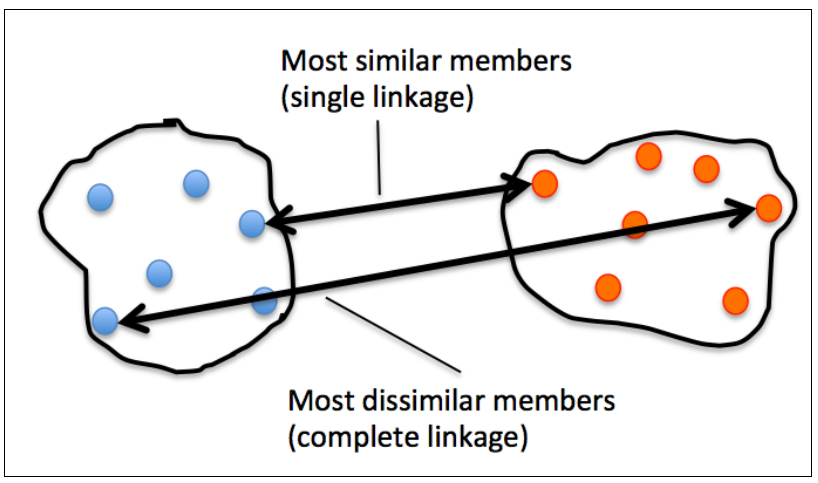

compelete linkage with divisive:  
1、计算所有样本的矩阵的距离。  
2、把每个点当成是一个类别  
3、基于最不相似的成员距离融合两个最近的类。    
4、更新相似矩阵  
5、重复2到4，直到全部融合。

In [29]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [31]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df,metric='euclidean')),columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [32]:
# linkage matrix
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete')
row_clusters1 = linkage(pdist(df, metric='euclidean'), method='complete')
row_clusters2 = linkage(df.values, metric='euclidean', method='complete')

/home/lily/tf3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


In [33]:
row_clusters

array([[ 0.        ,  4.        ,  6.52197264,  2.        ],
       [ 1.        ,  2.        ,  6.72960262,  2.        ],
       [ 3.        ,  5.        ,  8.53924727,  3.        ],
       [ 6.        ,  7.        , 12.44482356,  5.        ]])

In [34]:
row_clusters1

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [35]:
pd.DataFrame(row_clusters,columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],\
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


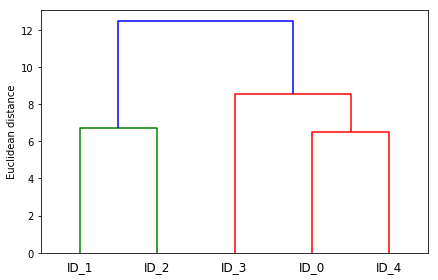

In [36]:
from scipy.cluster.hierarchy import dendrogram
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, labels=labels,\
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                      )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

树状图（dendrograms）和heat map组合。将树状图attach to 热土

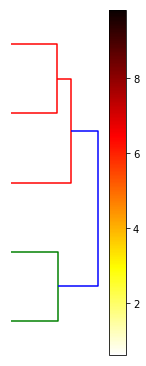

In [55]:
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6]) # 树状图的高度定义通过add_axes属性[左,下,宽,高]
row_dendr = dendrogram(row_clusters, orientation='right')

# 重新排列数据
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

# 移除axis spines。

cax = axm.matshow(df_rowclust,interpolation='nearest', cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [56]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


In [57]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


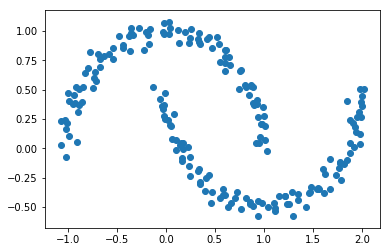

In [58]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

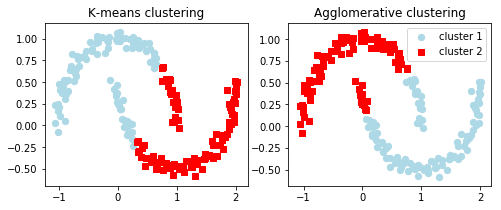

In [59]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2,random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0], X[y_km==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1,0],X[y_km==1,1],c='red',marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0], X[y_ac==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1,0], X[y_ac==1,1], c='red', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

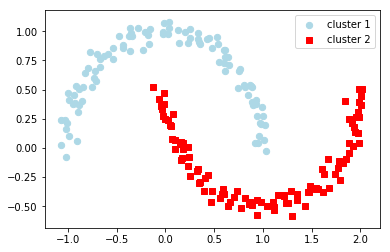

In [61]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5,metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0], X[y_db==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1,0],X[y_db==1,1],c='red',marker='s', s=40, label='cluster 2')
plt.legend()
plt.show()

DBSCAN的问题，当数据集的密度差别很大的时候，参数MinPts(中心点个数core points）和$\epsilon$（圆的半径）会很大  
另外一种推荐的更加先进的算法是graph-based clustering,  
specral clustering algorithms

DBSCAN优点：

    相比 k-平均，DBSCAN 不需要預先聲明聚類數量。
    DBSCAN 可以找出任何形狀的聚類，甚至能找出一個聚類，它包圍但不連接另一個聚類，另外，由於 MinPts 參數，single-link effect （不同聚類以一點或極幼的線相連而被當成一個聚類）能有效地被避免。
    DBSCAN 能分辨噪音（局外點）。
    DBSCAN 只需兩個參數，且對資料庫內的點的次序幾乎不敏感（兩個聚類之間邊緣的點有機會受次序的影響被分到不同的聚類，另外聚類的次序會受點的次序的影響）。
    DBSCAN 被設計成能配合可加速範圍訪問的資料庫結構，例如 R*樹。
    如果對資料有足夠的了解，可以選擇適當的參數以獲得最佳的分類。

DBSCAN缺点：

    DBSCAN 不是完全決定性的：在兩個聚類交界邊緣的點會視乎它在資料庫的次序決定加入哪個聚類，幸運地，這種情況並不常見，而且對整體的聚類結果影響不大——DBSCAN 對核心點和噪音都是決定性的。DBSCAN* 是一種變化了的演算法，把交界點視為噪音，達到完全決定性的結果。
    DBSCAN 聚類分析的質素受函數 regionQuery(P,ε) 裡所使用的度量影響，最常用的度量是歐幾里得距離，尤其在高維度資料中，由於受所謂「維數災難」影響，很難找出一個合適的 ε ，但事實上所有使用歐幾里得距離的演算法都受維數災難影響。
    如果資料庫裡的點有不同的密度，而該差異很大，DBSCAN 將不能提供一個好的聚類結果，因為不能選擇一個適用於所有聚類的 minPts-ε 參數組合。
    如果沒有對資料和比例的足夠理解，將很難選擇適合的 ε 參數。
